# Predicting Credit Risk using Decision Trees on the German Credit Dataset.

# Phase 1: Setting the Stage & Understanding the Problem


## Introduction
*(Why are we doing this?)*

In the financial world, accurately assessing the risk associated with lending money is paramount. Banks and financial institutions need to make informed decisions about whether to approve loan applications to minimize potential losses from loan defaults. This is not only crucial for the lender's financial stability but also ensures fair and responsible lending practices for individuals seeking credit.

Our project aims to tackle this real-world problem by building a predictive model that can classify individuals as either good or bad credit risks based on their financial attributes. By accurately identifying potential defaulters, we can help lenders mitigate risks and streamline their decision-making processes.

*Our specific goal is to develop a classification model using the provided **German Credit Dataset**.* This model will learn patterns from historical data to predict the creditworthiness of new applicants.

We will achieve this using a **Decision Tree**, a widely used and highly interpretable machine learning technique suitable for classification tasks.

### Introduction to the Chosen Technique (Decision Trees)

#### The Core Idea

Imagine you need to decide whether to lend money to a friend. You'd likely ask them a series of questions to gauge their reliability. For example: "Do you have a stable job?", "Do you have existing debts?", "Have you paid back loans in the past?". Based on their answers, you'd arrive at a decision.

A Decision Tree operates on a similar principle. It learns a hierarchy of questions about the input features (like age, employment status, credit history) to ultimately classify an instance into a predefined category – in our case, 'good' or 'bad' credit risk. Each internal node in the tree represents a question (or a test on an attribute), each branch represents the outcome of that test, and each leaf node represents a classification.

#### How it Learns

Decision Trees learn these "best" questions to ask at each step by analyzing the training data. The algorithm aims to find the attribute that best separates the data into groups that are as "pure" as possible with respect to the target variable ('CreditRisk').

This "purity" is often measured using criteria like **Gini Impurity** or **Entropy** (which relates to Information Gain). At each node, the tree evaluates all possible splits on all available features and selects the split that maximizes the information gained (i.e., the split that results in the most homogeneous child nodes in terms of credit risk). This process is repeated recursively until a stopping criterion is met (e.g., all instances in a node belong to the same class, or a maximum tree depth is reached).

#### Strengths

We've chosen a Decision Tree for several compelling reasons:

* **Interpretability:** Decision Trees are relatively easy to understand and visualize. The resulting tree structure clearly shows the decision rules used for classification, making it transparent to how a particular prediction is made. This interpretability is crucial in finance for understanding the factors influencing credit risk.
* **Handling Mixed Data Types:** Decision Trees can naturally handle both numerical (e.g., credit amount, duration) and categorical (e.g., sex, housing) features, although categorical features often require preprocessing.
* **Implicit Feature Selection:** During the tree-building process, the algorithm selects the most informative features for splitting. Less relevant features might not be used in the tree, effectively performing a form of feature selection.

#### Weaknesses (Important!)

It's important to be aware of the limitations of Decision Trees:

* **Overfitting:** Decision Trees can easily become too complex, learning the training data's noise and specific details rather than the underlying patterns. This leads to poor generalization on new, unseen data. We will need to employ techniques like **pruning** (limiting the tree's size and complexity) to mitigate this risk.
* **Sensitivity to Data Variations:** Small changes in the training data can sometimes lead to significantly different tree structures.
* **Bias towards Features with More Levels:** If a categorical feature has many levels, it might be unfairly favored during the splitting process.

### Introduction of the Dataset

#### Source and Context

The dataset we will be using is the German Credit Dataset, originally provided by Prof. Hofmann and available on the UCI Machine Learning Repository. This dataset contains information on 1000 individuals, each described by several financial and demographic attributes. The primary goal of this dataset is to classify these individuals into 'good' or 'bad' credit risks.

#### Features

The dataset includes the following features:

* **Age:** Age of the applicant (numerical).
* **Sex:** Gender of the applicant (categorical: male, female).
* **Job:** Type of job held by the applicant (categorical, with numerical encoding representing skill level).
* **Housing:** Type of housing owned by the applicant (categorical: own, rent, free).
* **Saving accounts:** Status of the applicant's savings account (categorical: NA, little, moderate, quite rich, rich).
* **Checking account:** Status of the applicant's checking account (categorical: little, moderate, rich, NA).
* **Credit amount:** The amount of credit requested (numerical, in Deutsch Marks).
* **Duration:** The duration for which the credit is requested (numerical, in months).
* **Purpose:** The purpose for which the credit is needed (categorical: radio/TV, education, furniture/equipment, car, business, domestic appliances, repairs, vacation/others).

#### The Target Variable (CRITICAL STEP)

After investigating the original dataset documentation, we have identified the target variable as the 'CreditRisk' column. This column contains two possible values: **'good'** and **'bad'**, indicating the lender's assessment of the applicant's creditworthiness. Our goal is to build a Decision Tree model that can accurately predict this 'CreditRisk' based on the other features in the dataset.

#### Initial Thoughts

Looking at the features, we can observe a mix of data types:

* **Numerical Features:** Age, Credit amount, Duration.
* **Categorical Features:** Sex, Job, Housing, Saving accounts, Checking account, Purpose, and our target variable, CreditRisk.

We also notice the presence of `"NA"` values in the 'Saving accounts' and 'Checking account' columns. These missing values will need to be addressed during the data preprocessing stage. Additionally, the categorical features will likely need to be encoded into a numerical format that can be processed by the *Decision Tree algorithm*.

# Phase 2: Data Exploration (EDA) and Preprocessing

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# set some display options for better readability
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid') # Makes plots look nicer

## Step-1: Load the data

In [4]:
# load the dataset
file_path = 'german_credit_data.csv'
df = pd.read_csv(file_path)

# look at the first few rows
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [ ]:
 # use the first column as index
df = pd.read_csv(file_path, index_col=0)

print(df.head())

print(df.tail())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car  
     Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN          

We can see that the dataset is missing the target attribute.

To tackle this issue we will have to import the original dataset and merge the target field which is *Credit Risk* in our case with the current dataframe.

In [ ]:
%pip install ucimlrepo

In [1]:
'''
  Following the steps instructed in the documentation to import the full dataset.
'''

from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

**Analysing the orgonal dataset, we have identified the target variable as the 'CreditRisk' column.**

**This column contains two possible values: 'good(='1')' and 'bad(='2')', indicating the lender's assessment of the applicant's creditworthiness.**

In [ ]:
# renaming the field name
y = y.rename(columns={'class': 'CreditRisk'})

# concatanate the target attribute with the dataframe we will be using
df = pd.concat([df, y], axis=1)

## Step-2: Initial Inspection of the dataset

In [ ]:
# check the rows (samples) and columns (features)?
df.shape

(1000, 10)

In [ ]:
''' This is crucial! It shows:
- Column names.
- Number of non-null values per column (helps spot missing data immediately).
- Data types (object usually means string/categorical; int64, float64 are numerical).
it is crucial to pay close attention here! We check if the numerical columns read correctly?
Are categorical ones 'object'?'''
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   CreditRisk        1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 85.9+ KB


In [ ]:
'''Get basic statistics for numerical columns (count, mean, standard deviation, min, max, percentiles).
Get a feel about the range and distribution of Age, Credit Amount, Duration?
Are there any surprising values (e.g., negative age)?'''

df.describe()

,Age,Job,Credit amount,Duration,CreditRisk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,1.300000
std,11.375469,0.653614,2822.736876,12.058814,0.458487
min,19.000000,0.000000,250.000000,4.000000,1.000000
25%,27.000000,2.000000,1365.500000,12.000000,1.000000
50%,33.000000,2.000000,2319.500000,18.000000,1.000000
75%,42.000000,2.000000,3972.250000,24.000000,2.000000
max,75.000000,3.000000,18424.000000,72.000000,2.000000


In [ ]:
'''Get basic statistics for categorical (object type)
columns (count, unique values, top value, frequency of top value).
How many unique categories are there in 'Sex', 'Housing', 'Purpose', etc.?
Is one category dominant?'''
df.describe(include='object')

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


## Step-3: Handling Missing Values:

In [ ]:
# checking for the missing/null values
df.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0
CreditRisk,0


In [ ]:
# impute categorical NaNs with a 'Missing' category
df['Saving accounts']=df['Saving accounts'].fillna('missing')
df['Checking account']=df['Checking account'].fillna('missing')

# verify that there are no more NaNs
print(df.isnull().sum())

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
CreditRisk          0
dtype: int64


### Justification

We chose to fill missing values in 'Saving accounts' and 'Checking account' with a new category *'Missing'*. This avoids losing data rows and explicitly signals the absence of information to the model, which might be a predictive factor itself. We preferred this over imputing the mode, as the absence of an account might be different from having an account of the most common type.

## Step-4: Visual Exploration (Understanding Distributions)

In [ ]:
# ensure that any infinite values are converted to NaN before analysis
df = df.replace([np.inf, -np.inf], np.nan)

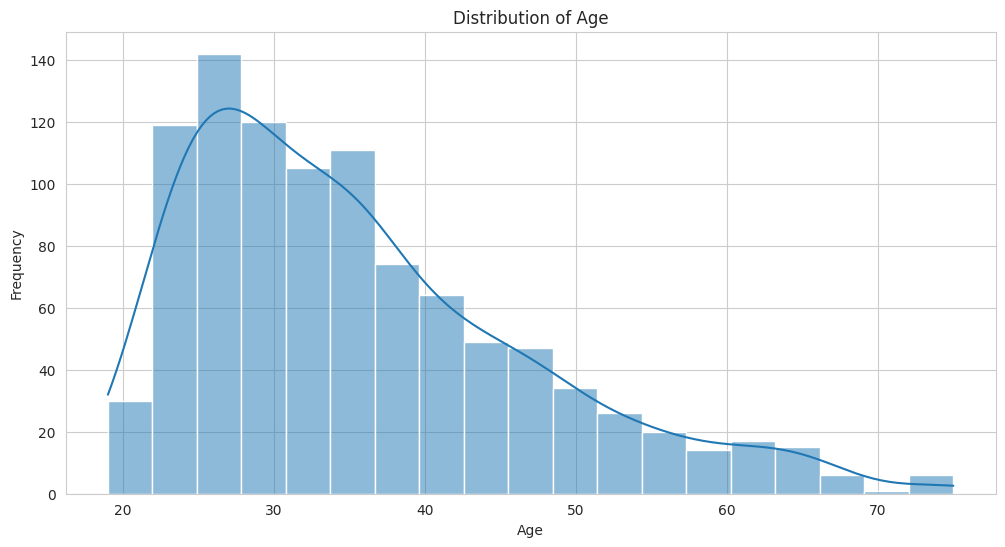

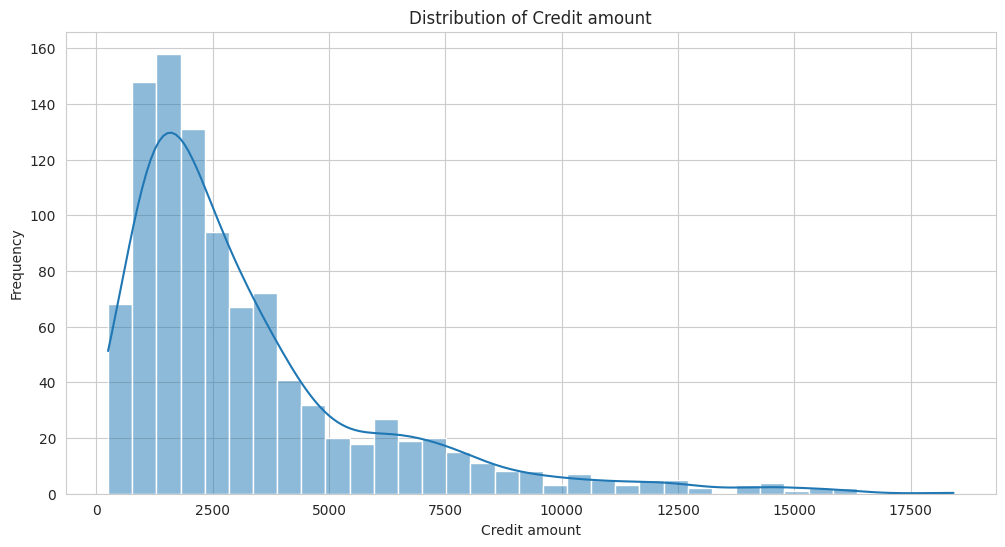

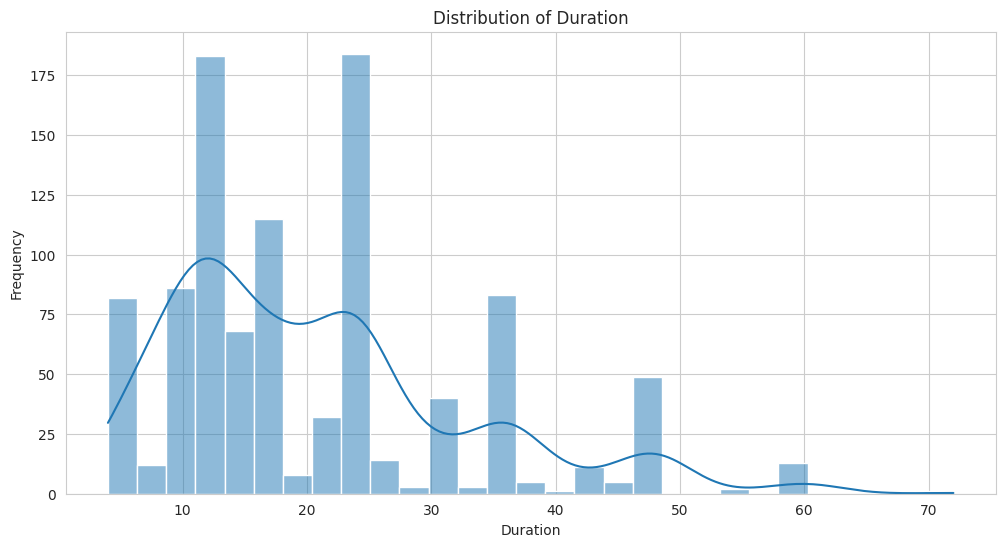

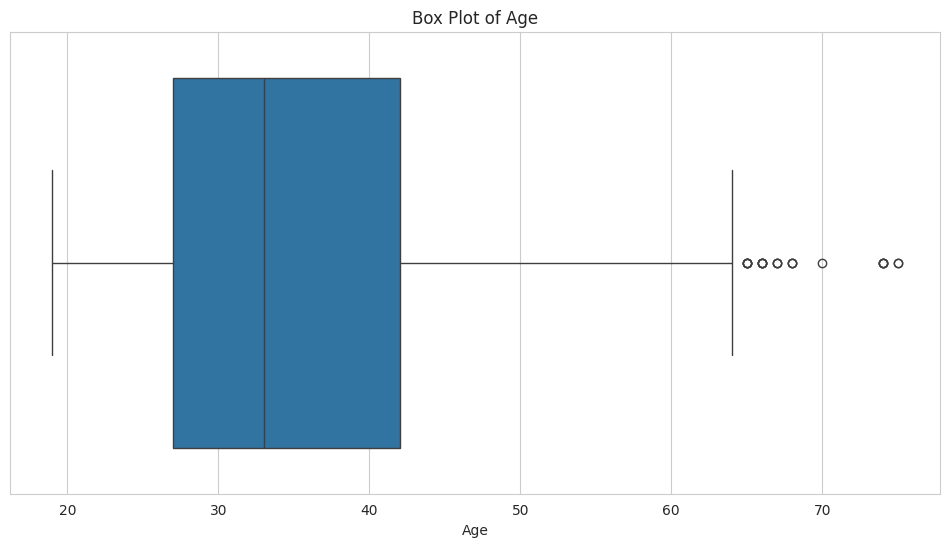

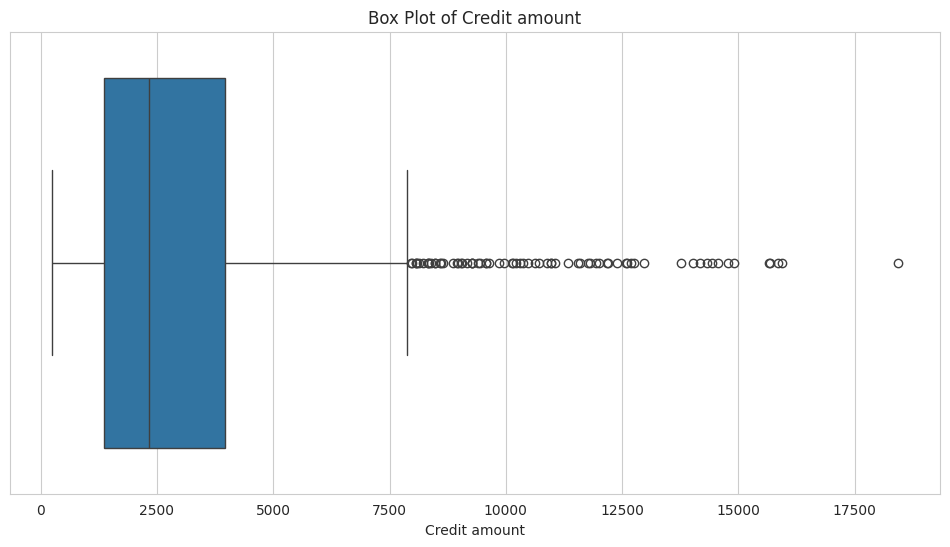

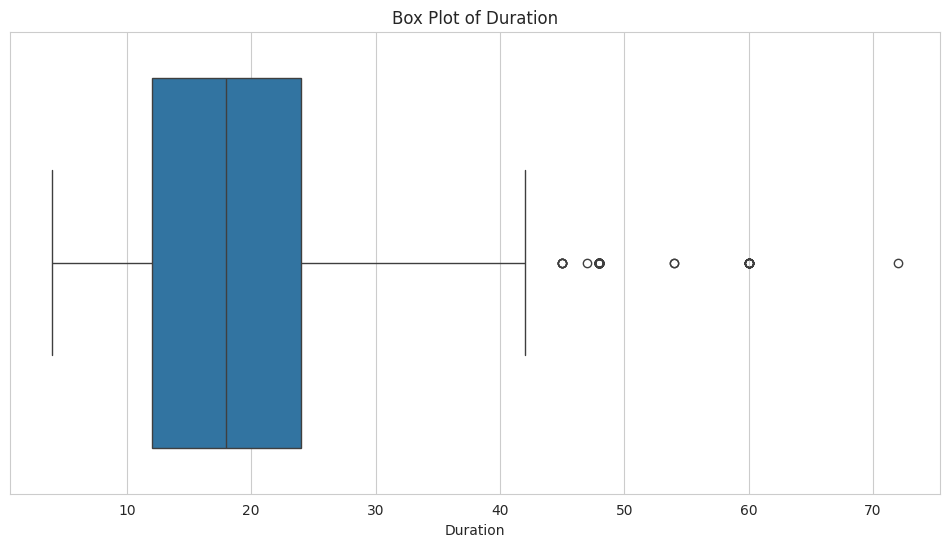

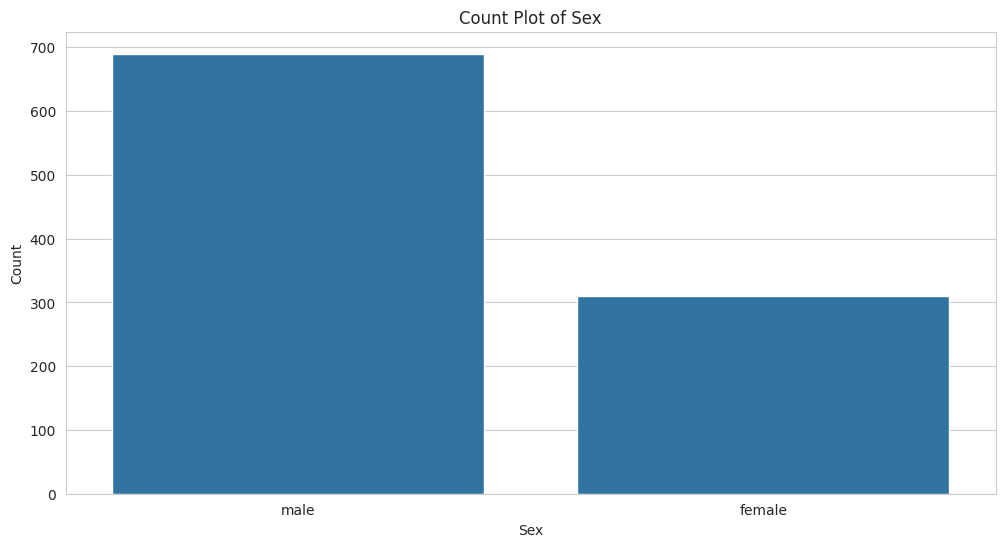

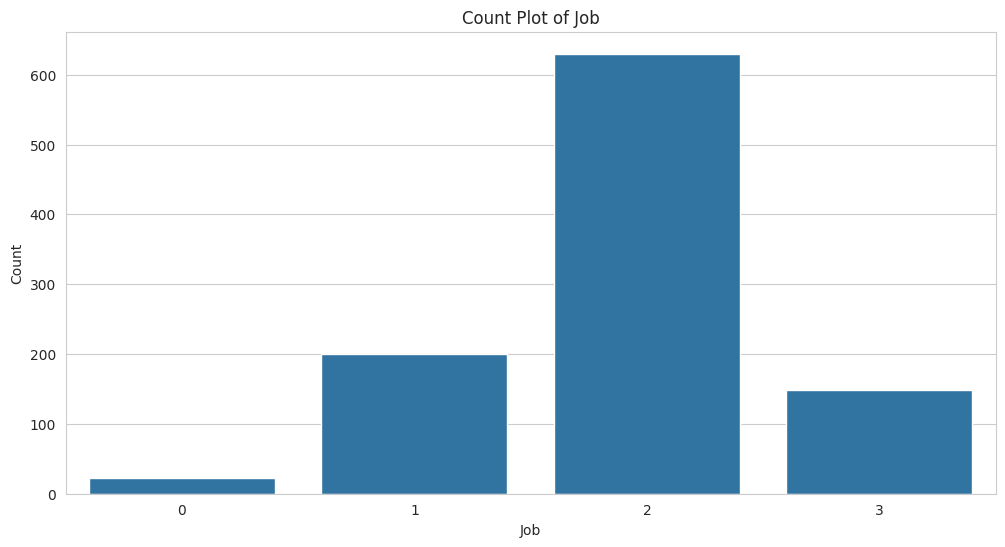

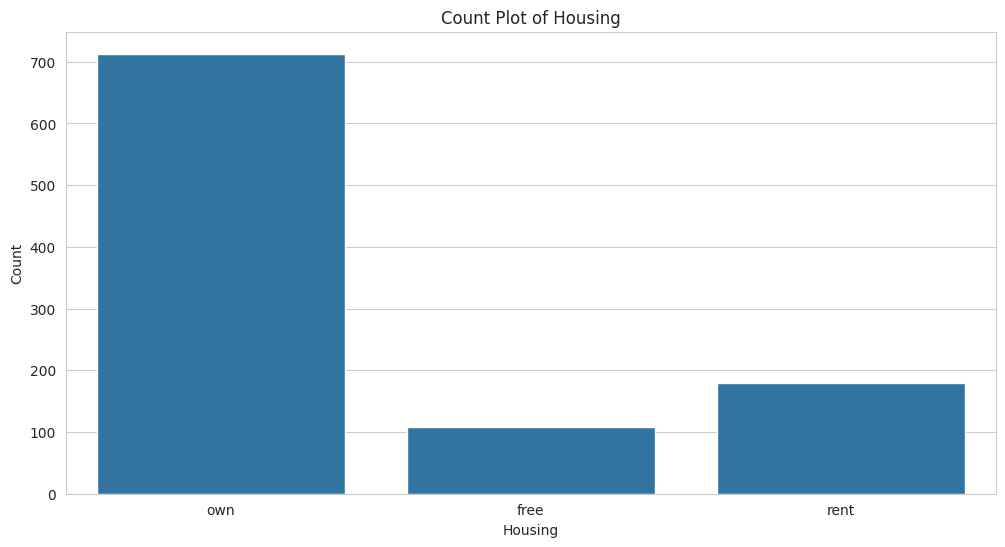

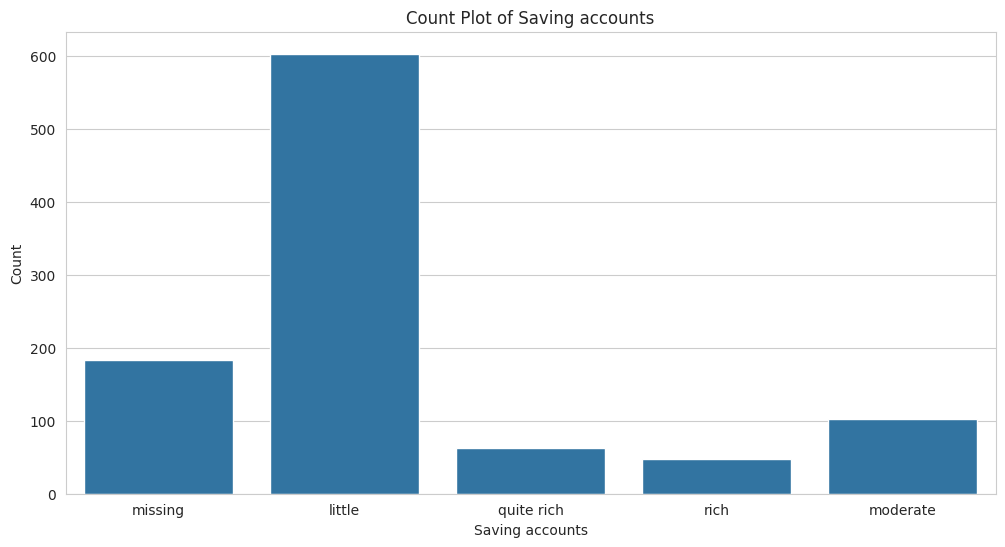

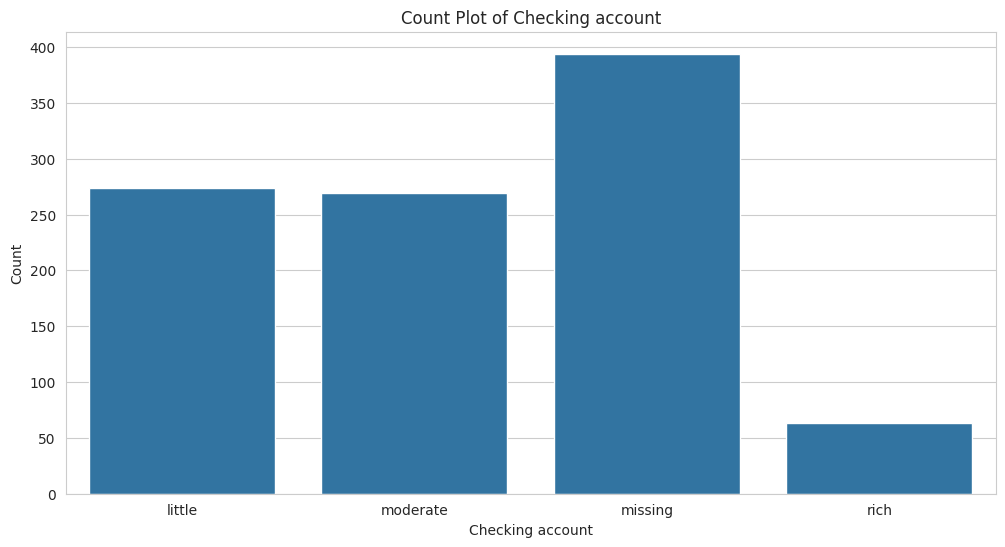

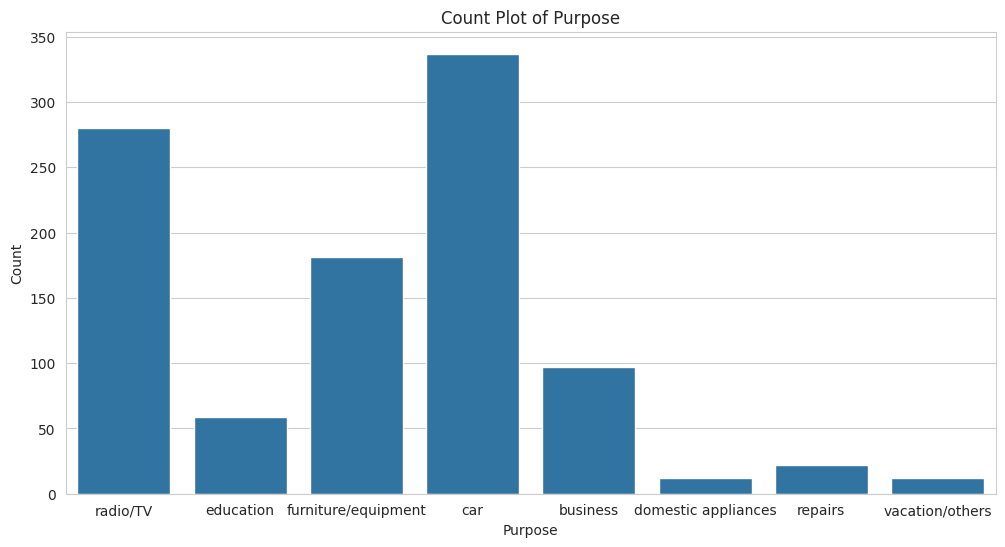

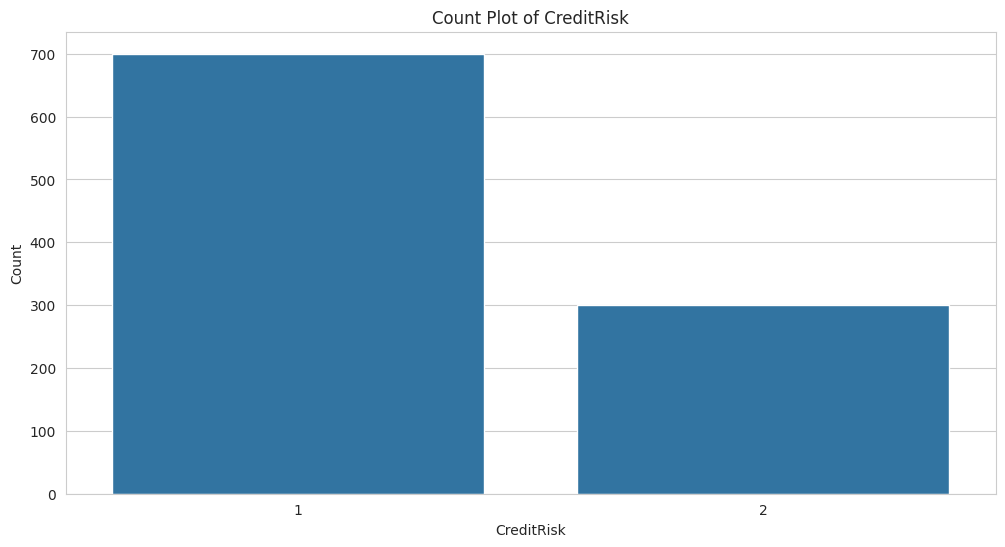

In [ ]:
numerical_cols = ['Age', 'Credit amount', 'Duration']

# bar graphs to observe the distribution or numerical features
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], kde=True)  # kde=True adds a kernel density estimate line
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# box plots to analyse the outliers
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

# countplots to check the consistency of the categorical data
categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'CreditRisk']
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

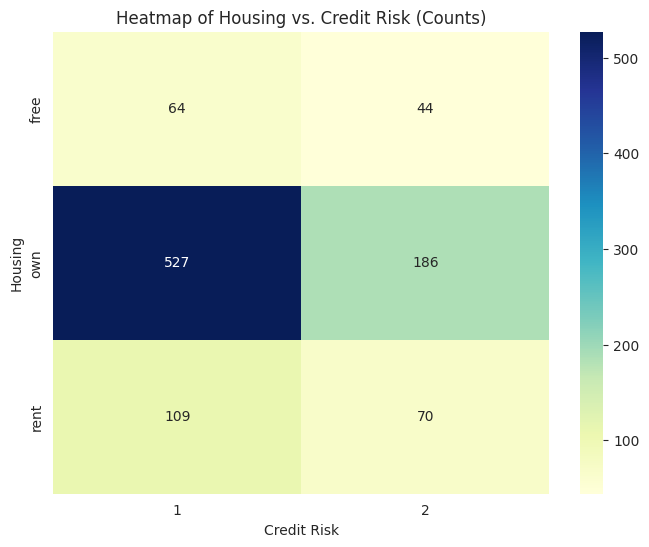

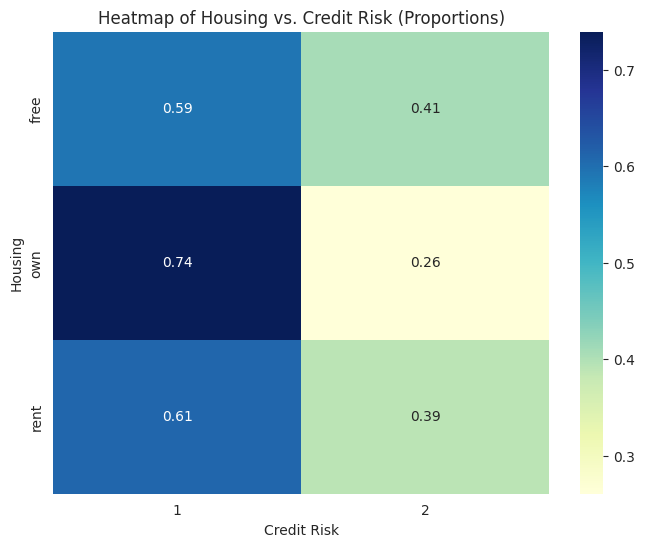

In [ ]:
# Contingency table of Housing vs. CreditRisk

'''
  this heatmap is all about seeing the raw numbers of how our categorical variables
  ('Housing' and 'CreditRisk') pair up. It's like a simple headcount for each combination.
  If a cell is really bright, it means that specific housing type and credit risk level
  occur together a lot in our data. This gives us a basic idea of the most common scenarios.
'''
contingency_table = pd.crosstab(df['Housing'], df['CreditRisk'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Housing vs. Credit Risk (Counts)')
plt.xlabel('Credit Risk')
plt.ylabel('Housing')
plt.show()


'''
  this second heatmap takes it a step further. Instead of just counts,
  it shows us percentages within each housing category. So, for each type of housing,
  we can see what proportion of people fall into 'good' risk versus 'bad' risk.
  This is super useful for comparing risk profiles across different housing situations,
  regardless of how many people have each type of housing. If we see big differences in
  these proportions, it suggests that housing might be a strong indicator of credit risk.
'''
# Heatmap of Housing vs. CreditRisk (Proportions)
contingency_table_prop = pd.crosstab(df['Housing'], df['CreditRisk'], normalize='index')
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_prop, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Housing vs. Credit Risk (Proportions)')
plt.xlabel('Credit Risk')
plt.ylabel('Housing')
plt.show()

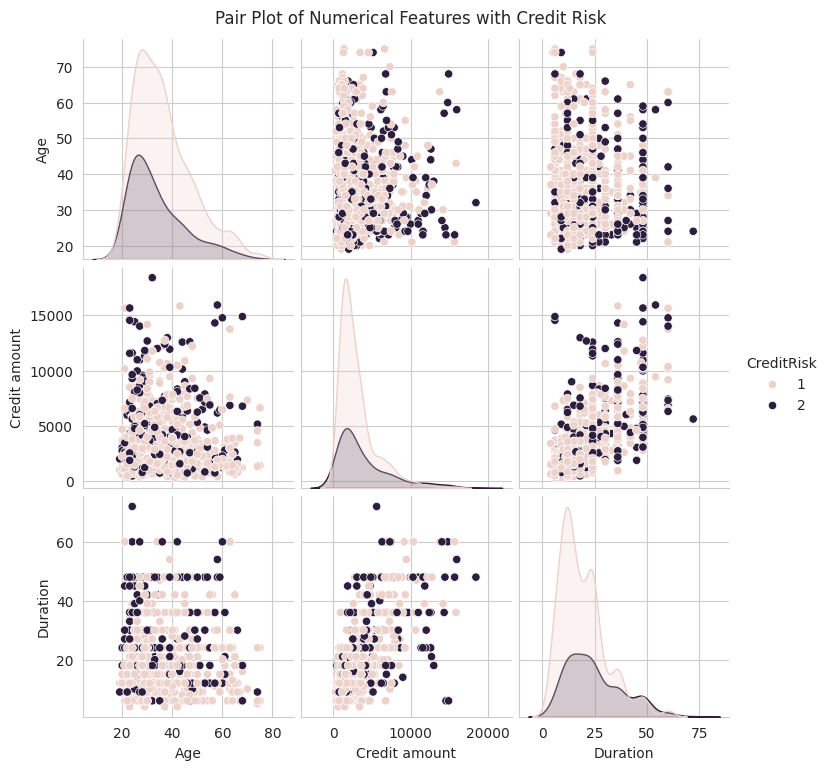

In [ ]:
'''
Usefulness:

Think of this as a quick way to eyeball relationships between *all* our key numerical columns at once,
and the super cool part is it also shows how our 'CreditRisk' (our target!) behaves across these relationships.

- For each pair of numerical features (like Age vs. Credit amount), the scatter plot shows if there's any
  obvious trend or pattern. Are younger people getting higher loans? Is there a duration sweet spot for good risk?

- The diagonal plots are like mini-histograms (or smooth versions of them) for each numerical feature, broken down
  by 'CreditRisk'. This helps see if, say, 'bad risk' individuals tend to be in a certain age range or have a different
  distribution of 'Credit amount' compared to 'good risk' individuals.

- The different colors (thanks to 'hue='CreditRisk') are the key! They let us see if the 'good' and 'bad' risk
  groups form distinct clusters or show different patterns in the scatter plots. If we see clear separation,
  it means those numerical features might be really good at predicting credit risk!

What it demonstrates:

- Potential correlations: Do two numerical features tend to increase or decrease together for both risk groups?
- Separation of classes: Can we visually distinguish 'good' risk from 'bad' risk based on combinations of these features?
- Distributions per class: How does the distribution of each numerical feature look for 'good' risk versus 'bad' risk?
  Are there noticeable differences in averages, spreads, or shapes?
- Potential for feature importance: If some scatter plots show clear separation by color, those features are likely important for our model to learn.

Basically, this plot is a fantastic first step to get a visual feel for how our numerical data interacts with itself and,
most importantly, with what we're trying to predict!

'''
numerical_cols_with_target = ['Age', 'Credit amount', 'Duration', 'CreditRisk']
sns.pairplot(df[numerical_cols_with_target], hue='CreditRisk')
plt.suptitle('Pair Plot of Numerical Features with Credit Risk', y=1.02)
plt.show()

**Why visualize?**

It helps understand the range, central tendency, and presence of potential issues like skewness or outliers that might influence the model or require further processing.

## Step-5: Input Encoding

In [ ]:
# checking the unique values for fields in the dataframe
for column in df.columns:
    unique_values = df[column].unique()
    num_unique = len(unique_values)
    print(f"Column '{column}' has {num_unique} unique values: \n{unique_values[:20]}. \n")

Column 'Age' has 53 unique values: 
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34]. 

Column 'Sex' has 2 unique values: 
['male' 'female']. 

Column 'Job' has 4 unique values: 
[2 1 3 0]. 

Column 'Housing' has 3 unique values: 
['own' 'free' 'rent']. 

Column 'Saving accounts' has 5 unique values: 
['missing' 'little' 'quite rich' 'rich' 'moderate']. 

Column 'Checking account' has 4 unique values: 
['little' 'moderate' 'missing' 'rich']. 

Column 'Credit amount' has 921 unique values: 
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430]. 

Column 'Duration' has 33 unique values: 
[ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14]. 

Column 'Purpose' has 8 unique values: 
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']. 

Column 'CreditRisk' has 2 unique values: 
[1 2]. 



### Manual Mapping *(Ordinal Encoding)*

For features like 'Saving accounts' and 'Checking account', where categories have an inherent order reflecting increasing wealth, we use ordinal encoding.

We mapped categories to integers (e.g., 'little' to 0, 'moderate' to 1). We assigned 'Missing' a separate value (e.g., -1) to distinguish it while potentially maintaining some ordinality if appropriate for the algorithm, or acknowledging it's different.

**Note:**

*(Decision trees can handle -1; some other models might prefer it treated differently. The 'Job' feature was already numerically encoded according to skill level.)*

In [ ]:
# define the order for Savings accounts
# be careful - ensure all unique values in your column are keys here!
savings_map = {'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3, 'missing': -1}
df['Saving accounts_encoded'] = df['Saving accounts'].map(savings_map)

# similarly for Checking account and Job
checking_map = {'little': 0, 'moderate': 1, 'rich': 2, 'missing': -1}
df['Checking account_encoded'] = df['Checking account'].map(checking_map)

# job is already numerical with order 0, 1, 2, 3 - hence, no mapping needed!
# just ensure its data type is integer, not object.
df['Job'] = df['Job'].astype(int)

### One-Hot Encoding

Features like 'Sex', 'Housing', and 'Purpose' are nominal, meaning their categories lack inherent order. To prevent the model from inferring a false hierarchy, we applied **One-Hot Encoding** using **Pandas' `get_dummies`**. This creates separate binary columns for each category, representing their presence or absence. We used `drop_first=True` to remove redundant columns and avoid potential multicollinearity issues.

In [ ]:
# one-Hot Encode nominal features
df_encoded = pd.get_dummies(df, columns=['Sex', 'Housing', 'Purpose'], drop_first=True)

# drop_first=True avoids multicollinearity by dropping one category per feature (e.g., drops 'female', 'free', one purpose)
# the dropped category is implicitly represented when all other dummies are 0.

# Note: we also need to handle the original ordinal columns we manually encoded
# let's keep the encoded versions and drop the original text versions
df_encoded.drop(['Saving accounts', 'Checking account'], axis=1, inplace=True)

# Rename the manually encoded columns for clarity if desired
df_encoded.rename(columns={'Saving accounts_encoded': 'Saving accounts',
                           'Checking account_encoded': 'Checking account'}, inplace=True)

# Display the first few rows and info of the fully encoded dataframe
print(df_encoded.head())
print(df_encoded.info())

   Age  Job  Credit amount  Duration  CreditRisk  Saving accounts  \
0   67    2           1169         6           1               -1   
1   22    2           5951        48           2                0   
2   49    1           2096        12           1                0   
3   45    2           7882        42           1                0   
4   53    2           4870        24           2                0   

   Checking account  Sex_male  Housing_own  Housing_rent  Purpose_car  \
0                 0      True         True         False        False   
1                 1     False         True         False        False   
2                -1      True         True         False        False   
3                 0      True        False         False        False   
4                 0      True        False         False         True   

   Purpose_domestic appliances  Purpose_education  \
0                        False              False   
1                        False          

In [ ]:
# checking the unique values for fields in the dataframe to double-check that everything has been encoded properly
for column in df_encoded.columns:
    unique_values = df_encoded[column].unique()
    num_unique = len(unique_values)
    print(f"Column '{column}' has {num_unique} unique values: \n{unique_values[:20]}. \n")

Column 'Age' has 53 unique values: 
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34]. 

Column 'Job' has 4 unique values: 
[2 1 3 0]. 

Column 'Credit amount' has 921 unique values: 
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430]. 

Column 'Duration' has 33 unique values: 
[ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14]. 

Column 'CreditRisk' has 2 unique values: 
[1 2]. 

Column 'Saving accounts' has 5 unique values: 
[-1  0  2  3  1]. 

Column 'Checking account' has 4 unique values: 
[ 0  1 -1  2]. 

Column 'Sex_male' has 2 unique values: 
[ True False]. 

Column 'Housing_own' has 2 unique values: 
[ True False]. 

Column 'Housing_rent' has 2 unique values: 
[False  True]. 

Column 'Purpose_car' has 2 unique values: 
[False  True]. 

Column 'Purpose_domestic appliances' has 2 unique values: 
[False  True]. 

Column 'Purpose_education' has 2 unique values: 
[False  True]. 

Column 'P

In [ ]:
'''
the 'CreditRisk' column has values 1 (good) and 2 (bad).
While this works, the standard convention for binary classification in scikit-learn,
especially when calculating metrics like confusion matrices, often assumes
classes are 0 and 1 (typically 0 for the "negative" or less desired class,
1 for the "positive" or target class).
Let's remap 'CreditRisk': 2 (bad) -> 0 and 1 (good) -> 1.
This makes interpretation of metrics later slightly more standard
(e.g., predicting class '1' means predicting 'good risk').
It aligns with standard practice and makes interpreting results from scikit-learn
functions (like confusion matrix where row/column 0 often corresponds to the negative class)
more straightforward.
'''
# check current values first to be sure
print("Original CreditRisk values:", df_encoded['CreditRisk'].unique())
print("Value counts:\n", df_encoded['CreditRisk'].value_counts()) # check balance

Original CreditRisk values: [1 2]
Value counts:
 CreditRisk
1    700
2    300
Name: count, dtype: int64


In [ ]:
# remap: 1 (good) -> 1, 2 (bad) -> 0
# Note: Ensure this matches your data description if it differs.
df_encoded['CreditRisk'] = df_encoded['CreditRisk'].map({1: 1, 2: 0})

# Verify the remapping
print("New CreditRisk values:", df_encoded['CreditRisk'].unique())
print("Value counts:\n", df_encoded['CreditRisk'].value_counts()) # check balance again

New CreditRisk values: [1 0]
Value counts:
 CreditRisk
1    700
0    300
Name: count, dtype: int64


## Separating Features and Target

Now that the data is clean and numerical, and the target is appropriately encoded, we need to create our feature matrix *'x'* (all columns except 'CreditRisk') and our target vector *'y'* (the 'CreditRisk' column).

**Why separate?**

This is the standard input format for scikit-learn models: `model.fit(X, y)`

In [ ]:
# separate features (x) and target (y)
x = df_encoded.drop('CreditRisk', axis=1)
y = df_encoded['CreditRisk']

# Display shapes to confirm
print("Features (x) shape:", x.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of x:\n", x.head())
print("\nFirst 5 values of y:\n", y.head())

Features (x) shape: (1000, 16)
Target (y) shape: (1000,)

First 5 rows of x:
    Age  Job  Credit amount  Duration  Saving accounts  Checking account  \
0   67    2           1169         6               -1                 0   
1   22    2           5951        48                0                 1   
2   49    1           2096        12                0                -1   
3   45    2           7882        42                0                 0   
4   53    2           4870        24                0                 0   

   Sex_male  Housing_own  Housing_rent  Purpose_car  \
0      True         True         False        False   
1     False         True         False        False   
2      True         True         False        False   
3      True        False         False        False   
4      True        False         False         True   

   Purpose_domestic appliances  Purpose_education  \
0                        False              False   
1                        False    

# Phase 3: Splitting the Data for Training and Testing

Now, this is absolutely critical for honest model evaluation. We cannot train our Decision Tree on all the data and then test it on the same data.

**Why?** Because the model might simply memorize the training examples (especially prone with Decision Trees, overfitting is a prominent issue). It might look like it performs perfectly, but it won't generalize to new, unseen data, which is the whole point!


**The Concept:**
- **Train-Test Split:**
We split our dataset (X and y) into two parts:

  1. *Training Set (e.g., 70-80% of the data):*
  
    Used to teach the Decision Tree model. The model learns the patterns and decision rules from this data (X_train, y_train).

  2. *Testing Set (e.g., 20-30% of the data):*
    
    Kept aside and completely unseen by the model during training. We use this set to evaluate how well the trained model performs on new data (X_test, y_test). This gives us a more realistic measure of its generalization ability.

In [ ]:
# define the test size (e.g., 20% for testing, 80% for training)
test_proportion = 0.20

# define a random state for reproducibility
# using the same number ensures that we get the same split every time you run the code
random_seed = 41

# perform the split
# stratify=y is important here!
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=test_proportion,
    random_state=random_seed,
    stratify=y  # ensures train and test sets have similar proportions of good/bad risk
)

# print the shapes of the resulting sets to verify
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Optionally, check the class distribution in train and test sets
print("\ny_train distribution:\n", y_train.value_counts(normalize=True))
print("\ny_test distribution:\n", y_test.value_counts(normalize=True))

x_train shape: (800, 16)
x_test shape: (200, 16)
y_train shape: (800,)
y_test shape: (200,)

y_train distribution:
 CreditRisk
1    0.7
0    0.3
Name: proportion, dtype: float64

y_test distribution:
 CreditRisk
1    0.7
0    0.3
Name: proportion, dtype: float64


**stratify=y:**

*This is crucial, especially for datasets where classes might be imbalanced (like credit risk, where 'bad' risk is often rarer than 'good'). It ensures that the proportion of 'good' (1) and 'bad' (0) risk samples is approximately the same in both the training set and the testing set as it was in the original dataset. Looking back at the EDA count plots for 'CreditRisk' – it was imbalanced! The value counts after remapping showed 700 good (1) and 300 bad (0), so yes, 70/30 split. Hence, stratification is definitely needed!*

# Phase 4: Building the Model

## Step-1: Initiate the Model

- Creating an instance of the DecisionTreeClassifier. For now, let's start with mostly default settings, but we'll set random_state for reproducibility. This ensures that if there's any randomness in the algorithm (e.g., tie-breaking during feature selection), we get the same tree structure each time we run the code.

- **Why start simple?**
  
    We want to establish a baseline performance. We can tune hyperparameters (like `max_depth`, `min_samples_split`, etc.) later to potentially improve the model and prevent overfitting, but first, let's see what a standard tree does.

In [ ]:
# instantiate the Decision Tree Classifier
# using random_state for reproducibility
dt_classifier = DecisionTreeClassifier(random_state=41)

## Step-2: Train the Model (The Learning Step):

This is the core learning phase. We will use the `.fit()` method and provide it with our training data (`X_train, y_train`). The algorithm will analyze this data, determine the best splits (features and thresholds) based on criteria like `gini impurity`, and build the tree structure.

In [ ]:
# train the model using the training data
dt_classifier.fit(x_train, y_train)

print("Decision Tree Classifier trained successfully!")

Decision Tree Classifier trained successfully!


**What's happening inside fit()?**

*The algorithm recursively partitions the data.* At each node, it searches for the feature and split point that best separates the classes (maximizes information gain or minimizes Gini impurity). This continues until stopping criteria are met (e.g., nodes are pure, or other limits like max depth are reached - though we haven't set those yet).

## Step-3: Visualize the Tree and Inspect it

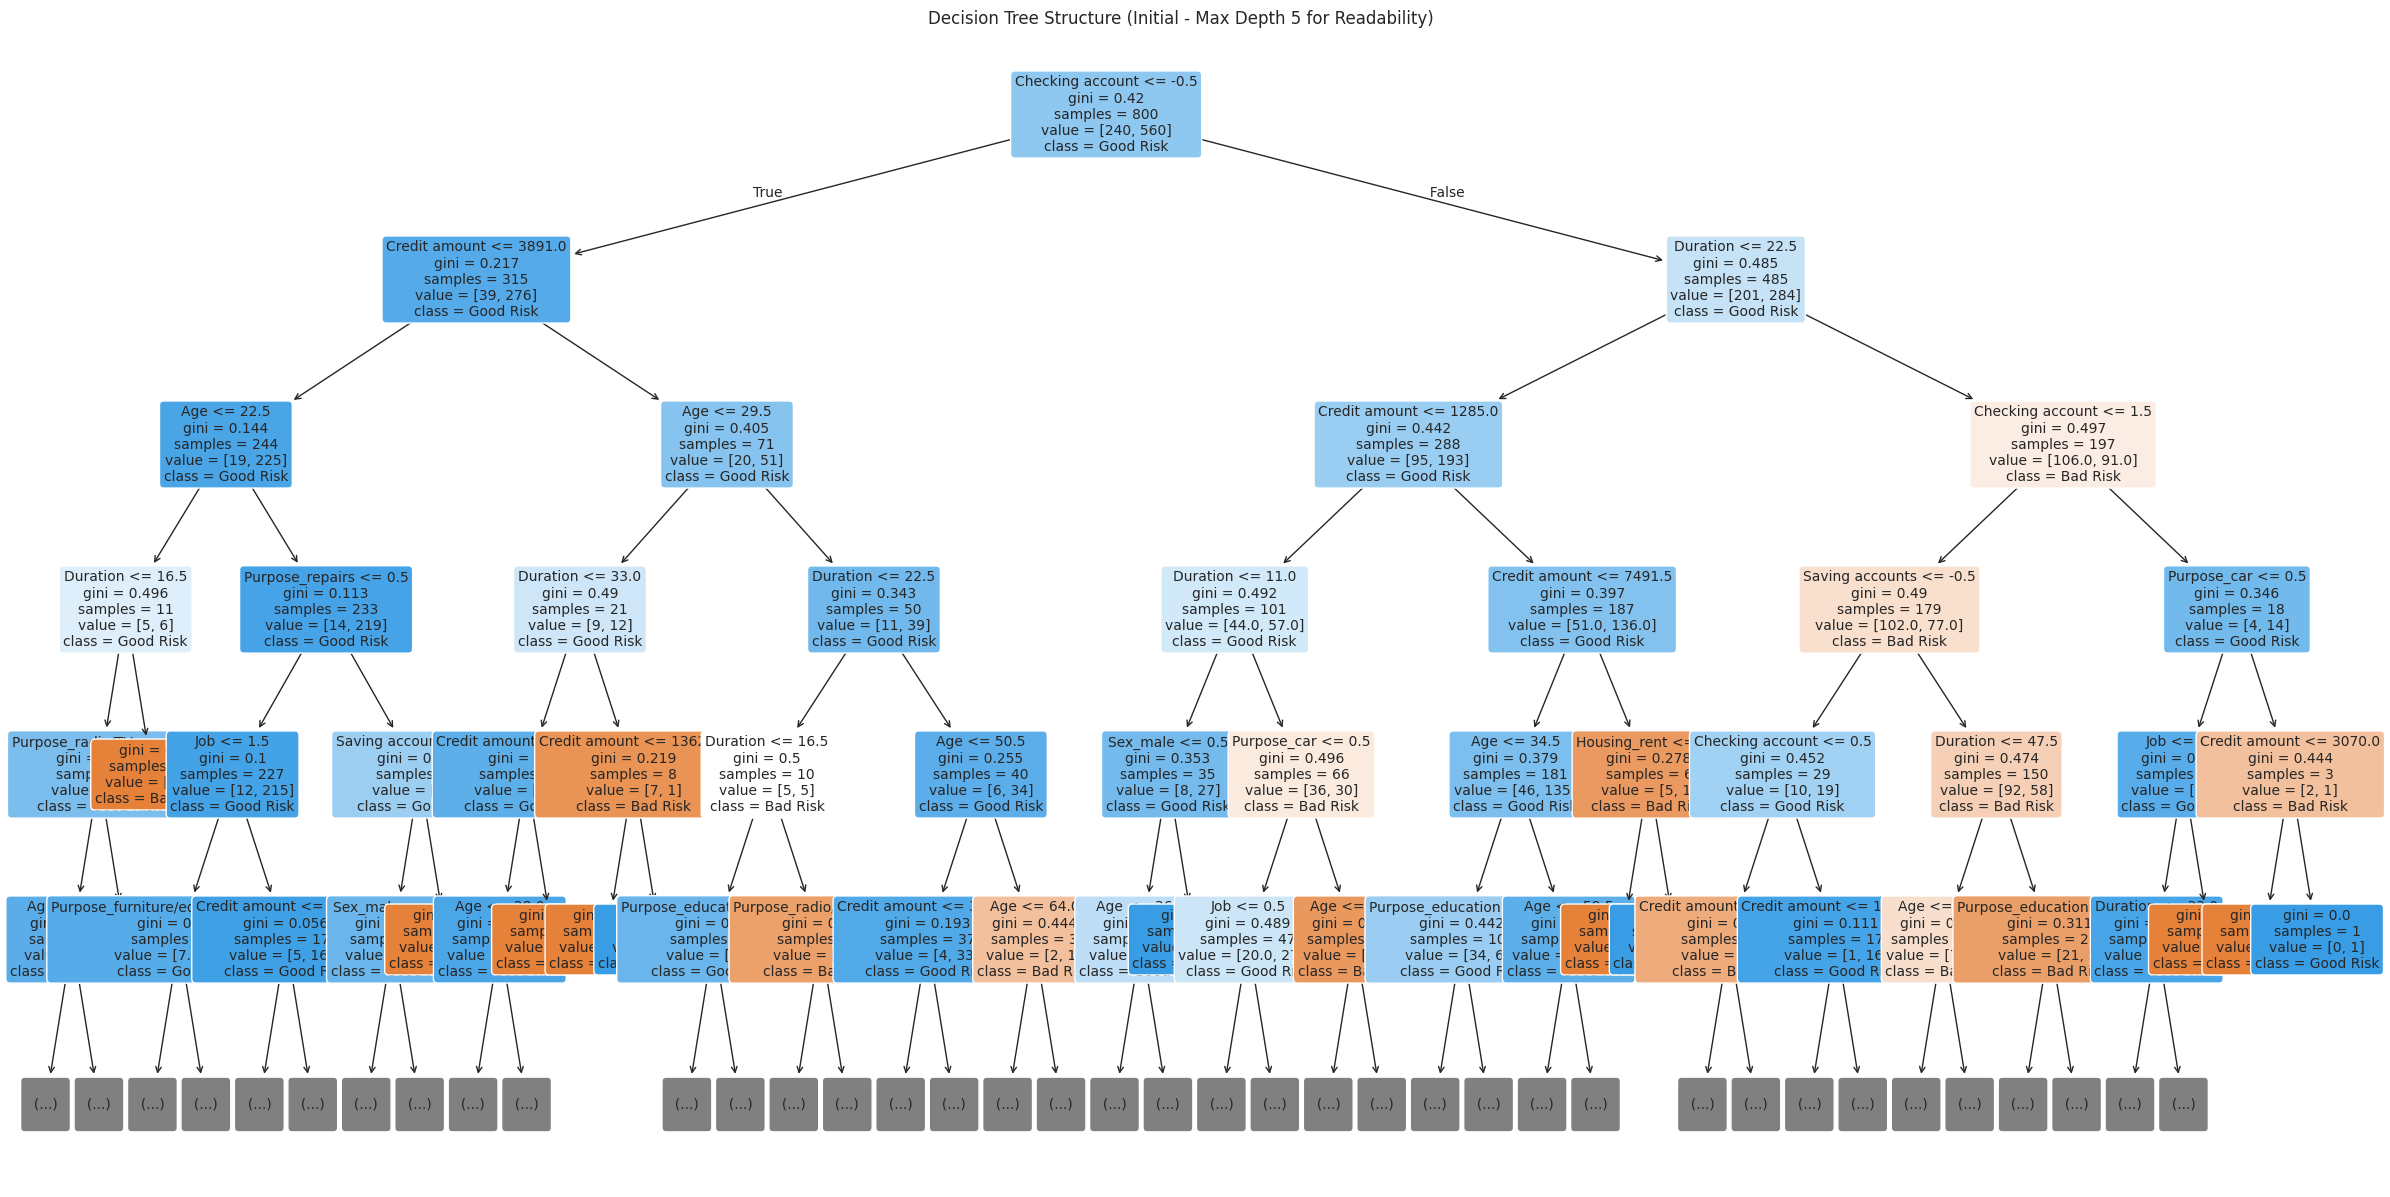

In [ ]:
# define class names for better visualization
# remember: 0 = 'bad', 1 = 'good' after our remapping
class_names = ['Bad Risk', 'Good Risk']

# get feature names from the training data columns
feature_names = x_train.columns.tolist()

# plot the trained tree
plt.figure(figsize=(30, 15))
plot_tree(dt_classifier,
          filled=True,       # color nodes by majority class
          feature_names=feature_names, # use actual feature names
          class_names=class_names,   # use our defined class names
          rounded=True,      # round node corners
          fontsize=10,       # adjust font size
          max_depth=5)       # ** limit depth for initial view **
plt.title("Decision Tree Structure (Initial - Max Depth 5 for Readability)")
plt.show()

**Interpreting the Plot:**


-  Each box is a node.
- The top line shows the splitting condition (e.g., Checking account <= 0.5).
- `gini`: The Gini impurity at that node (lower is better/purer).
- `samples`: How many training samples reach that node.
- `value`: The count of samples belonging to each class ([bad, good]) at that node.
- `class`: The majority class at that node.
- The arrows represent True/False branches for the condition.
- Leaf nodes (at the bottom) don't have further splits and represent the final prediction for samples reaching them.


**Note on max_depth=5:**

A fully grown default tree on this data might be enormous and unreadable. We've added `max_depth=5` just for this visualization to get a glimpse of the top levels. The actual dt_classifier object is still the fully trained, potentially much deeper, tree.

**Observation:**

Looking at the visualized part of the tree. Does it seem complex? Does it split down to nodes with very few samples? This is a visual clue about potential overfitting. An unconstrained tree will keep splitting until nodes are pure or contain only one sample, perfectly fitting the training noise.

# Phase 5: Evaluate the Model

We need metrics to quantify the model's performance. Accuracy is common, but for problems like credit risk (where misclassifying a 'bad' risk as 'good' can be costly), we need a more nuanced view.

## Step-1: Make Predictions on the Test Set

In [ ]:
# make predictions on the test set
y_pred = dt_classifier.predict(x_test)

# display the first few predictions vs actual values (optional check)
print("First 10 Predictions:", y_pred[:10])
print("First 10 Actual Values:", y_test[:10].values)

First 10 Predictions: [0 1 1 1 0 1 1 1 0 0]
First 10 Actual Values: [1 1 1 1 0 1 1 1 1 1]


## Step-2: Calculate Accuracy

In [ ]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}") # Format to 4 decimal places

Accuracy on Test Set: 0.5750


## Step-3: Confusion Matrix


Confusion Matrix:
 [[19 41]
 [44 96]]


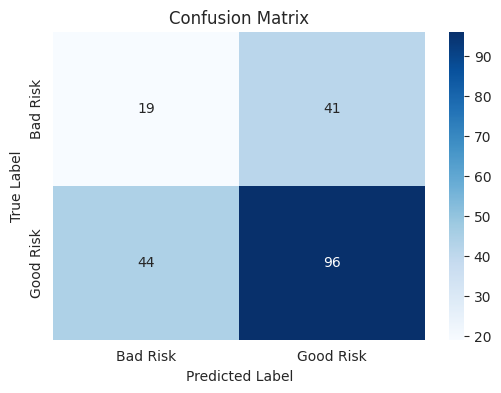

In [ ]:
# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# For better readability, let's visualize it using seaborn
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Step-4: Classification Report

In [ ]:
# generate the classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

    Bad Risk       0.30      0.32      0.31        60
   Good Risk       0.70      0.69      0.69       140

    accuracy                           0.57       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.58      0.57      0.58       200



# Phase 6: Analysis of Results (Initial Analysis & Next Steps)

## Step-1: Initial Analysis of Baseline Model:


- Overall Performance:
  An accuracy of 0.575 (57.5%) is quite poor. Our dataset has a 70/30 split between 'Good Risk' and 'Bad Risk'. A model that always predicted 'Good Risk' would achieve 70% accuracy. Our current model is doing significantly worse than that simple baseline, indicating it's not learning effective patterns.

- Confusion Matrix Breakdown:
  
  - True Negatives (Correctly Bad): 19

  - False Positives (Predicted Good, Actually Bad): 41 -
  
  - This is a major problem! The model incorrectly labeled 41 out of 60 actual bad risks as good. For a bank, this means potentially approving many loans that will default.

  - False Negatives (Predicted Bad, Actually Good): 44 - The model also incorrectly flagged 44 good risks as bad, leading to potentially lost business or unfair decisions.
  True Positives (Correctly Good): 96

- Classification Report Insights:
  
  - Bad Risk (Class 0): The precision (0.30) and recall (0.32) are extremely low. This confirms the confusion matrix: the model is terrible at identifying bad risks (low recall) and when it does predict bad risk, it's often wrong (low precision). The F1-score (0.31) reflects this poor performance.
  
  - Good Risk (Class 1): Performance is better (Precision 0.70, Recall 0.69, F1 0.69), but still not outstanding.

- Likely Cause: Overfitting: These results strongly suggest our default Decision Tree overfitted to the training data. It learned the training examples, including their noise and specific quirks, too well. When faced with the unseen test data, the learned rules didn't generalize, leading to poor predictions. The potentially huge, complex tree structure we discussed earlier is characteristic of an overfit tree.

## Step-2: Improving the Model - Pruning the Tree

The most immediate and important step is to control the complexity of the Decision Tree to prevent overfitting. We will do this by **pruning the tree**, which means setting limits on its growth during training. This is achieved by tuning the model's hyperparameters.

**Key Hyperparameters for Pruning:**

1. *`max_depth`:* Limits how deep the tree can grow. A shallower tree is simpler and less likely to overfit.

2. *`min_samples_split`:* Sets the minimum number of samples a node must have before it can be split further. Higher values prevent splits on very small, potentially noisy groups.

3. *`min_samples_leaf`:* Sets the minimum number of samples required to be in a leaf node. Ensures that final predictions are based on a reasonable number of examples.

**Strategy:**

We start with `max_depth`: Let's begin by experimenting with max_depth. We'll train new trees with different, limited depths and see how their performance on the test set changes. We expect that as we constrain the depth, the performance on the test set should improve (up to a point) even if the performance on the training set might decrease slightly.

Starting hyperparameter tuning for max_depth...
  Depth:  1 | Train Accuracy: 0.7000 | Test Accuracy: 0.7000
  Depth:  2 | Train Accuracy: 0.7188 | Test Accuracy: 0.7200
  Depth:  3 | Train Accuracy: 0.7312 | Test Accuracy: 0.7300
  Depth:  4 | Train Accuracy: 0.7675 | Test Accuracy: 0.7500
  Depth:  5 | Train Accuracy: 0.7975 | Test Accuracy: 0.7250
  Depth:  6 | Train Accuracy: 0.8325 | Test Accuracy: 0.7000
  Depth:  7 | Train Accuracy: 0.8462 | Test Accuracy: 0.6850
  Depth:  8 | Train Accuracy: 0.8738 | Test Accuracy: 0.6750
  Depth:  9 | Train Accuracy: 0.8925 | Test Accuracy: 0.6750
  Depth: 10 | Train Accuracy: 0.9087 | Test Accuracy: 0.6450
  Depth: 11 | Train Accuracy: 0.9225 | Test Accuracy: 0.6500
  Depth: 12 | Train Accuracy: 0.9425 | Test Accuracy: 0.6400
  Depth: 13 | Train Accuracy: 0.9525 | Test Accuracy: 0.6350
  Depth: 14 | Train Accuracy: 0.9738 | Test Accuracy: 0.6400
  Depth: 15 | Train Accuracy: 0.9900 | Test Accuracy: 0.6050
  Depth: 16 | Train Accuracy: 0.9975 

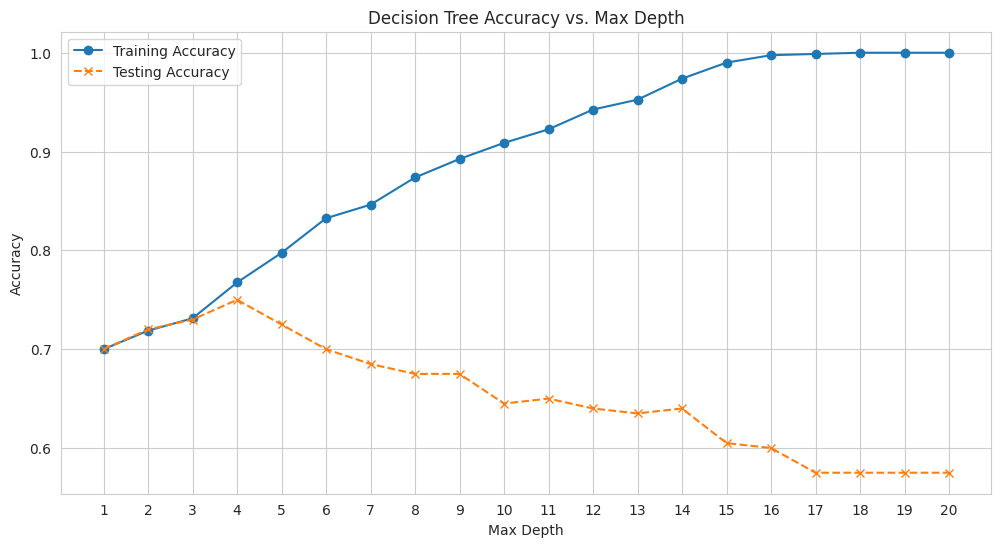


--- Optimal Max Depth ---
The best performing max_depth on the test set is: 4
Test Accuracy at max_depth=4: 0.7500
Training Accuracy at max_depth=4: 0.7675


In [ ]:
# --- Hyperparameter Tuning Loop for max_depth ---

# 1. define the range of max_depth values to test
max_depth_range = range(1, 21) # Example: testing depths from 1 to 20

# 2.create lists to store accuracy scores for training and testing sets
train_accuracy_scores = []
test_accuracy_scores = []

# 3. loop through each depth value
print("Starting hyperparameter tuning for max_depth...")
for depth in max_depth_range:
    # Instantiate a Decision Tree with the current max_depth
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=41)

    # Train the model on the training data
    dt_model.fit(x_train, y_train)

    # Make predictions on the TRAINING set
    y_train_pred = dt_model.predict(x_train)
    # Calculate accuracy on the TRAINING set
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(train_acc)

    # Make predictions on the TEST set
    y_test_pred = dt_model.predict(x_test)
    # Calculate accuracy on the TEST set
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy_scores.append(test_acc)

    # Optional: Print progress
    print(f"  Depth: {depth:2d} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

print("Hyperparameter tuning complete.")

# --- Plotting the Results ---

plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, train_accuracy_scores, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(max_depth_range, test_accuracy_scores, label='Testing Accuracy', marker='x', linestyle='--')

plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_range) # Ensure integer depths are labeled on x-axis
plt.legend()
plt.grid(True)
plt.show()

# --- Identifying the Best Depth ---

# find the index corresponding to the highest test accuracy
best_test_accuracy_index = np.argmax(test_accuracy_scores) # Using numpy's argmax is convenient

# get the optimal depth and its corresponding accuracy
optimal_depth = max_depth_range[best_test_accuracy_index]
best_test_accuracy = test_accuracy_scores[best_test_accuracy_index]
corresponding_train_accuracy = train_accuracy_scores[best_test_accuracy_index]

print(f"\n--- Optimal Max Depth ---")
print(f"The best performing max_depth on the test set is: {optimal_depth}")
print(f"Test Accuracy at max_depth={optimal_depth}: {best_test_accuracy:.4f}")
print(f"Training Accuracy at max_depth={optimal_depth}: {corresponding_train_accuracy:.4f}")

Pruned Decision Tree (max_depth=4) trained successfully!

--- Evaluation of Pruned Model (max_depth=4) ---
Accuracy on Test Set: 0.7500

Confusion Matrix:
 [[ 39  21]
 [ 29 111]]


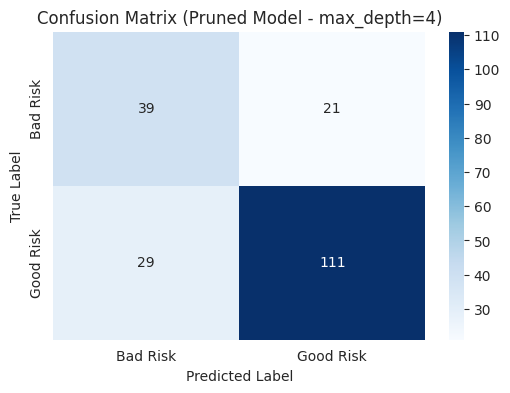


Classification Report:
               precision    recall  f1-score   support

    Bad Risk       0.57      0.65      0.61        60
   Good Risk       0.84      0.79      0.82       140

    accuracy                           0.75       200
   macro avg       0.71      0.72      0.71       200
weighted avg       0.76      0.75      0.75       200



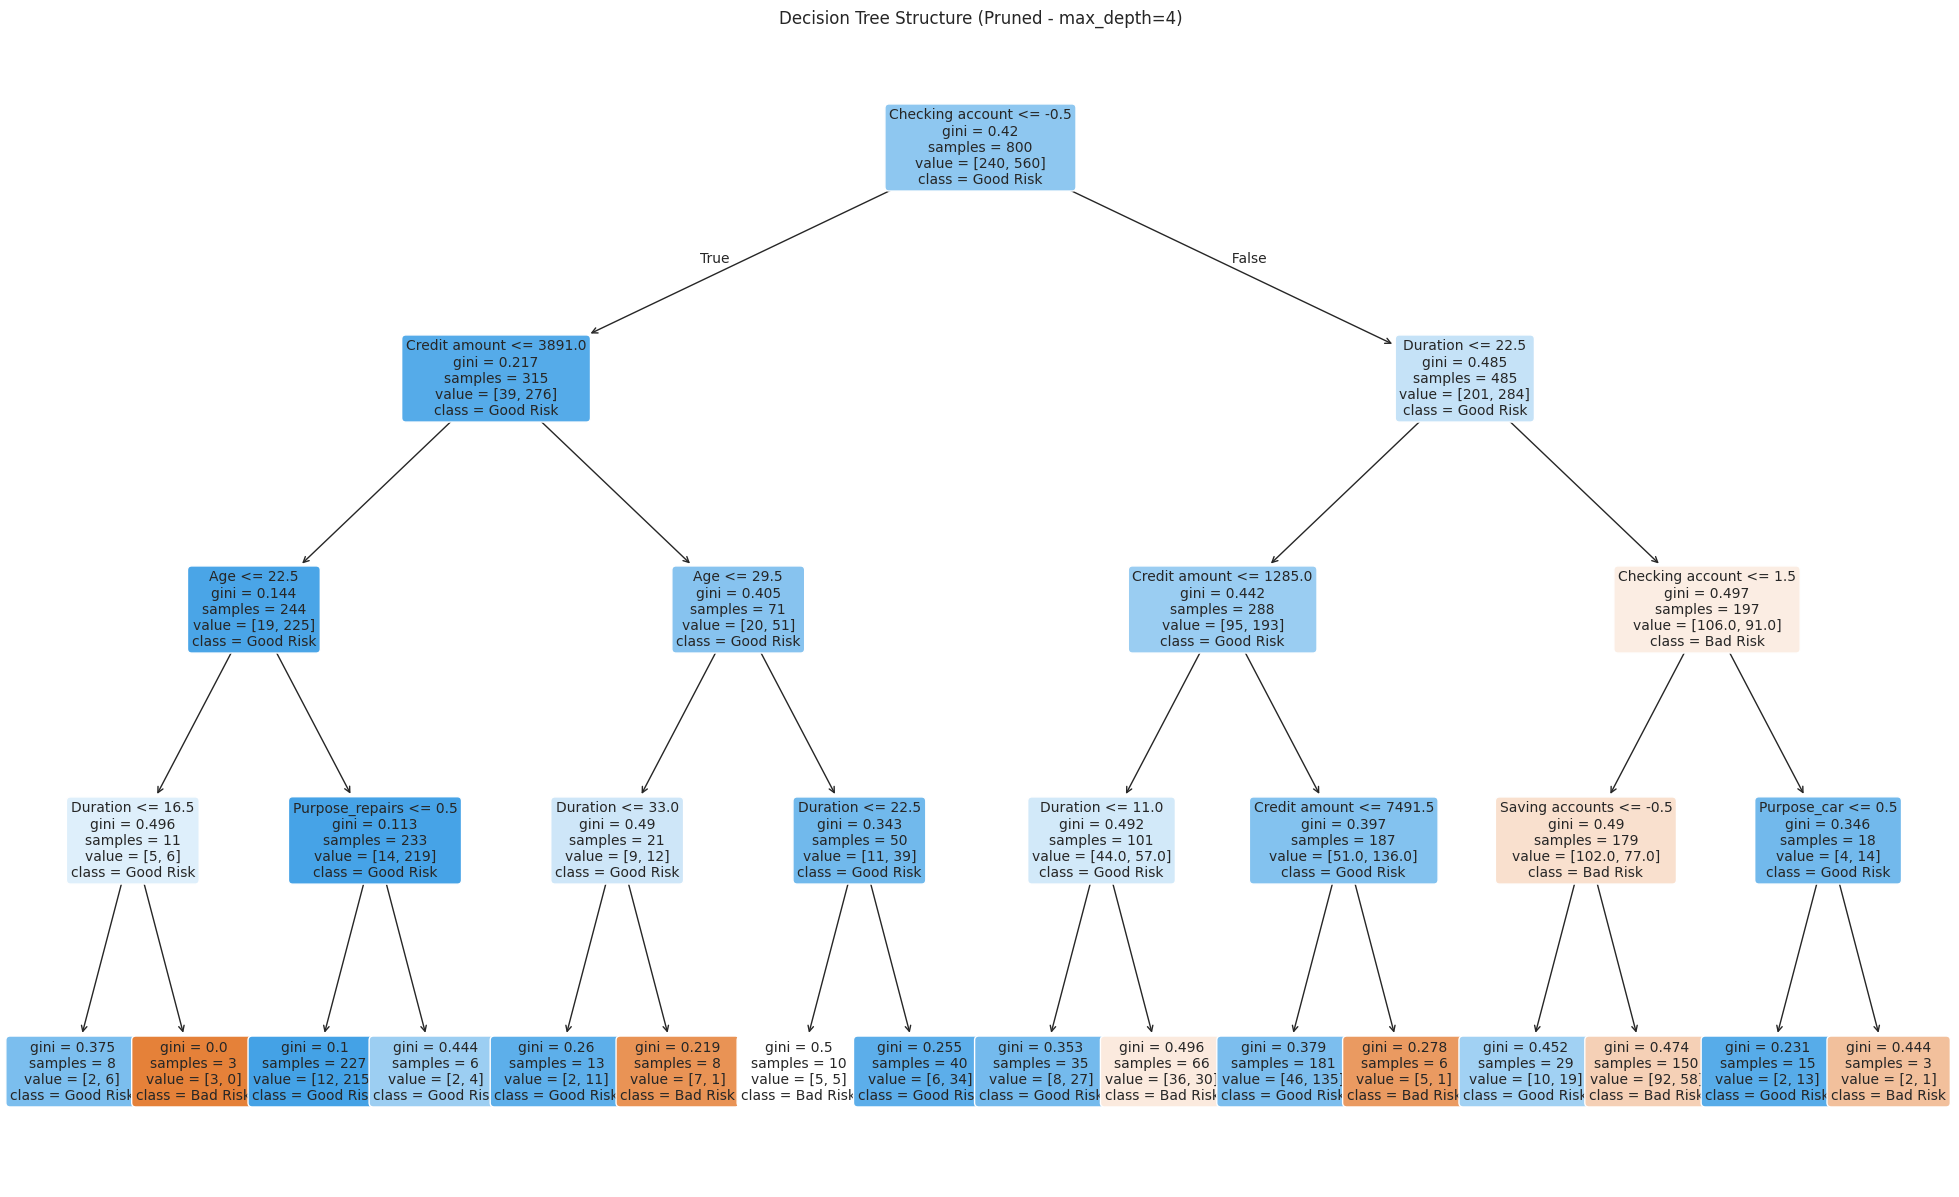

In [ ]:
# --- Retraining with Pruning ---

# 1. instantiate a NEW Decision Tree with max_depth
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=41)

# 2. train this pruned model on the *same* training data
dt_pruned.fit(x_train, y_train)
print("Pruned Decision Tree (max_depth=4) trained successfully!")

# 3. make predictions on the *same* test data
y_pred_pruned = dt_pruned.predict(x_test)

# 4. evaluate the *pruned* model
print("\n--- Evaluation of Pruned Model (max_depth=4) ---")

# accuracy
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy on Test Set: {accuracy_pruned:.4f}")

# confusion Matrix
cm_pruned = confusion_matrix(y_test, y_pred_pruned)
print("\nConfusion Matrix:\n", cm_pruned)

# visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_pruned, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Pruned Model - max_depth=4)')
plt.show()

# classification Report
report_pruned = classification_report(y_test, y_pred_pruned, target_names=class_names)
print("\nClassification Report:\n", report_pruned)

# 5. visualize the Pruned Tree
plt.figure(figsize=(25, 15))
plot_tree(dt_pruned,
          filled=True,
          feature_names=feature_names,
          class_names=class_names,
          rounded=True,
          fontsize=10) # No max_depth needed here as the tree is already pruned
plt.title("Decision Tree Structure (Pruned - max_depth=4)")
plt.show()

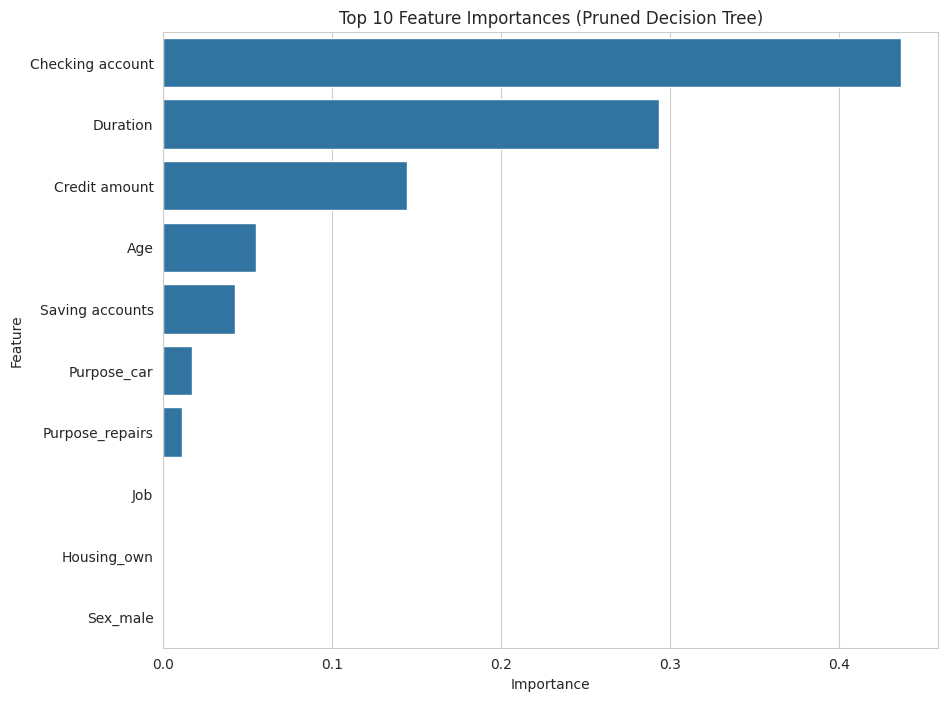


Feature Importances:
                         Feature  Importance
5              Checking account    0.437014
3                      Duration    0.293278
2                 Credit amount    0.144181
0                           Age    0.054977
4               Saving accounts    0.042288
9                   Purpose_car    0.017164
14              Purpose_repairs    0.011099
1                           Job    0.000000
7                   Housing_own    0.000000
6                      Sex_male    0.000000
10  Purpose_domestic appliances    0.000000
8                  Housing_rent    0.000000
11            Purpose_education    0.000000
12  Purpose_furniture/equipment    0.000000
13             Purpose_radio/TV    0.000000
15      Purpose_vacation/others    0.000000


In [ ]:
# get feature importances from the pruned model (dt_pruned)
importances = dt_pruned.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10)) # Show top 10
plt.title('Top 10 Feature Importances (Pruned Decision Tree)')
plt.show()

print("\nFeature Importances:\n", feature_importance_df)

## Impact of Pruning:

### Overall Performance:
Accuracy jumped from 0.575 to **0.750**! This is a substantial gain and now comfortably beats the baseline of always predicting the majority class (70%). This clearly demonstrates that controlling the tree's complexity by setting **max_depth=4** significantly reduced overfitting and improved generalization.

### Confusion Matrix Breakdown (max_depth=4):
* True Negatives (Correctly Bad): 39 (Increased from 19)
* False Positives (Predicted Good, Actually Bad): 21 (Decreased significantly from 41) - **Crucial Improvement!** We are now misclassifying far fewer bad risks as good. This is a big win for the bank's perspective.
* False Negatives (Predicted Bad, Actually Good): 29 (Decreased from 44) - We are also misclassifying fewer good risks as bad.
* True Positives (Correctly Good): 111 (Increased from 96)

### Classification Report Insights (max_depth=4):
* **Bad Risk (Class 0):**
    * `Recall` jumped dramatically from 0.32 to **0.65**. This is a massive improvement – the pruned model now correctly identifies 65% of the actual bad risks in the test set, compared to only 32% before.
    * `Precision` also increased substantially from 0.30 to **0.57**. When the model predicts 'Bad Risk', it is now correct 57% of the time, much better than 30%.
    * The `F1-score` improved significantly to **0.61**, indicating a much better balance between precision and recall for the minority class.
* **Good Risk (Class 1):** Performance also improved here (`Precision` 0.84, `Recall` 0.79, `F1` 0.82), showing the model is now better overall.

### Conclusion from Pruning:
Setting **max_depth=4** effectively controlled the Decision Tree's tendency to overfit. It created a simpler model that captured more generalizable patterns in the data, leading to much better performance on the unseen test set, especially in identifying the critical 'Bad Risk' cases.

## Step-3: Further Improvements

While `max_depth=4` gave good results, we could potentially refine this further.

* **Exploring Other Hyperparameters:** We focused on `max_depth`. We could also experiment with `min_samples_split` and `min_samples_leaf`. Sometimes adjusting these in combination with `max_depth` can yield slightly better results.

* **Systematic Hyperparameter Tuning (Grid Search):** Manually trying values is good for understanding, but for finding the **optimal** combination of hyperparameters, we can use techniques like **Grid Search Cross-Validation** (`GridSearchCV`).
    * **How it works:** You define a "grid" of hyperparameter values you want to try (e.g., `max_depth: [3, 4, 5, 6]`, `min_samples_split: [2, 5, 10]`, `min_samples_leaf: [1, 3, 5]`). `GridSearchCV` then automatically trains and evaluates models (using cross-validation on the **training** data) for **all possible combinations** from your grid. It then tells you which combination gave the best average performance during cross-validation.
    * **Benefit:** More systematic and less tedious than manual tuning. It uses cross-validation to get a more robust estimate of performance for each hyperparameter set, reducing the risk of overfitting to a specific train-test split during the tuning process itself.

* **Feature Importance:** Now that we have a reasonable model, we can investigate **which** features the Decision Tree found most important for making its decisions.

# Phase 6 (Continued): Systematic Hyperparameter Tuning with GridSearchCV

**The Goal**:

We want to find the combination of `max_depth`, `min_samples_split`, and `min_samples_leaf` (and maybe criterion) that yields the best-performing Decision Tree for our credit risk prediction task, using a more robust method than just trying `max_depth` manually.

Running GridSearchCV...
Fitting 5 folds for each of 280 candidates, totalling 1400 fits
GridSearchCV complete!

Best parameters found by GridSearchCV: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 15}
Best cross-validation score (recall_macro): 0.6521

--- Evaluation of Best Model from GridSearchCV on Test Set ---
Accuracy on Test Set: 0.7000

Confusion Matrix:
 [[ 37  23]
 [ 37 103]]


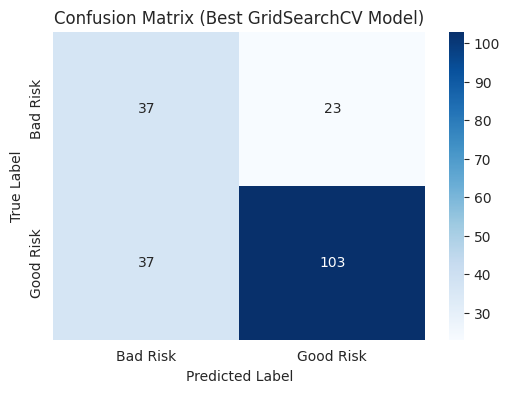


Classification Report:
               precision    recall  f1-score   support

    Bad Risk       0.50      0.62      0.55        60
   Good Risk       0.82      0.74      0.77       140

    accuracy                           0.70       200
   macro avg       0.66      0.68      0.66       200
weighted avg       0.72      0.70      0.71       200



In [ ]:
# define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],           # Splitting criterion
    'max_depth': [3, 4, 5, 6, 7, 8, None],      # Depth of the tree (None means nodes expanded until pure or min_samples)
    'min_samples_split': [2, 5, 10, 15],       # Min samples required to split an internal node
    'min_samples_leaf': [1, 3, 5, 7, 10]       # Min samples required at a leaf node
}

# Note: 'None' for max_depth allows the grid search to also consider the unconstrained tree
# within the cross-validation process, comparing it against pruned versions.

# choose a scoring metric suitable for potentially imbalanced data
scoring_metric = 'recall_macro'

# instantiate the base Decision Tree classifier
dt_base = DecisionTreeClassifier(random_state=41)

# instantiate GridSearchCV
# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all available processors to speed up
grid_search = GridSearchCV(estimator=dt_base,
                           param_grid=param_grid,
                           cv=5,
                           scoring=scoring_metric,
                           n_jobs=-1,
                           verbose=1) # verbose=1 shows progress

# fit GridSearchCV to the TRAINING data (it does its own internal splitting)
print("Running GridSearchCV...")
grid_search.fit(x_train, y_train)
print("GridSearchCV complete!")

# get the best parameters found by the search
best_params = grid_search.best_params_
print(f"\nBest parameters found by GridSearchCV: {best_params}")

# get the best score achieved during cross-validation
best_score = grid_search.best_score_
print(f"Best cross-validation score ({scoring_metric}): {best_score:.4f}")

# get the best estimator (the model trained with the best parameters)
best_dt_classifier = grid_search.best_estimator_

# make predictions on the TEST set using the BEST model from GridSearchCV
y_pred_best = best_dt_classifier.predict(x_test)

# --- Evaluation of the Best Model from GridSearchCV ---
print("\n--- Evaluation of Best Model from GridSearchCV on Test Set ---")

# accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy on Test Set: {accuracy_best:.4f}")

# confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:\n", cm_best)

# visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Best GridSearchCV Model)')
plt.show()

# classification Report
report_best = classification_report(y_test, y_pred_best, target_names=class_names)
print("\nClassification Report:\n", report_best)

# Conclusion

This project successfully demonstrated the implementation and refinement of a Decision Tree classifier for predicting credit risk using the German Credit Dataset. The primary goal was to build a model capable of distinguishing between 'good' and 'bad' credit applicants based on various personal and financial attributes.

Initial data exploration revealed a dataset with a mix of numerical and categorical features, including missing values in the 'Saving accounts' and 'Checking account' columns. Preprocessing was crucial: missing values were imputed using a distinct 'Missing' category (mapped to -1), and categorical features were encoded appropriately. Ordinal features ('Saving accounts', 'Checking account', 'Job') were manually mapped to preserve inherent order, while nominal features ('Sex', 'Housing', 'Purpose') were one-hot encoded using `pd.get_dummies` to avoid introducing artificial ordinal relationships. The target variable 'CreditRisk' was mapped to 0 (Bad) and 1 (Good) for standard binary classification evaluation.

An initial, unpruned Decision Tree model was trained as a baseline. Evaluation on the held-out test set revealed poor performance (Accuracy: ~0.57), significantly worse than simply predicting the majority class. The extremely low recall (0.32) for the 'Bad Risk' class and a high number of False Positives indicated severe overfitting to the training data, resulting in poor generalization.

To address overfitting, model complexity was controlled through pruning. Manual tuning of the `max_depth` hyperparameter showed significant improvement. A tree with `max_depth=4` yielded the best results in this manual exploration, dramatically increasing test set accuracy to 0.75 and, more importantly, boosting the recall for 'Bad Risk' from 0.32 to 0.65. This highlights the critical importance of pruning Decision Trees to improve their real-world predictive power.

A more systematic hyperparameter tuning approach using `GridSearchCV` with 5-fold cross-validation (optimizing for `'recall_macro'`) was also performed to explore a wider range of parameters (`max_depth`, `min_samples_split`, `min_samples_leaf`, `criterion`). While this method provided a rigorous search, the best model identified through this process did not outperform the manually tuned `max_depth=4` model on the final test set evaluation metrics. This suggests that the simpler pruning approach had already found a near-optimal configuration for this specific data split and model type, or that optimizing specifically for `'recall_macro'` led to a different performance trade-off.

Feature importance analysis on the best performing model (`max_depth=4`) revealed that 'Checking account' status, 'Duration' of the loan, and 'Credit amount' were the most influential factors in the tree's decisions, aligning with financial intuition. Several other features like 'Age' and 'Saving accounts' had minor importance, while many features (including 'Job', 'Sex', 'Housing') were not utilized by this specific pruned tree.

In conclusion, by carefully preprocessing the data and applying pruning techniques to control model complexity, we successfully transformed a poorly performing baseline Decision Tree into a significantly more accurate and reliable model for predicting credit risk. The final pruned model (`max_depth=4`) provides interpretable insights into the key drivers of creditworthiness within this dataset. While further improvements might be possible with different algorithms or more extensive tuning, this project effectively demonstrates the core principles of building, evaluating, and refining a Decision Tree classifier.

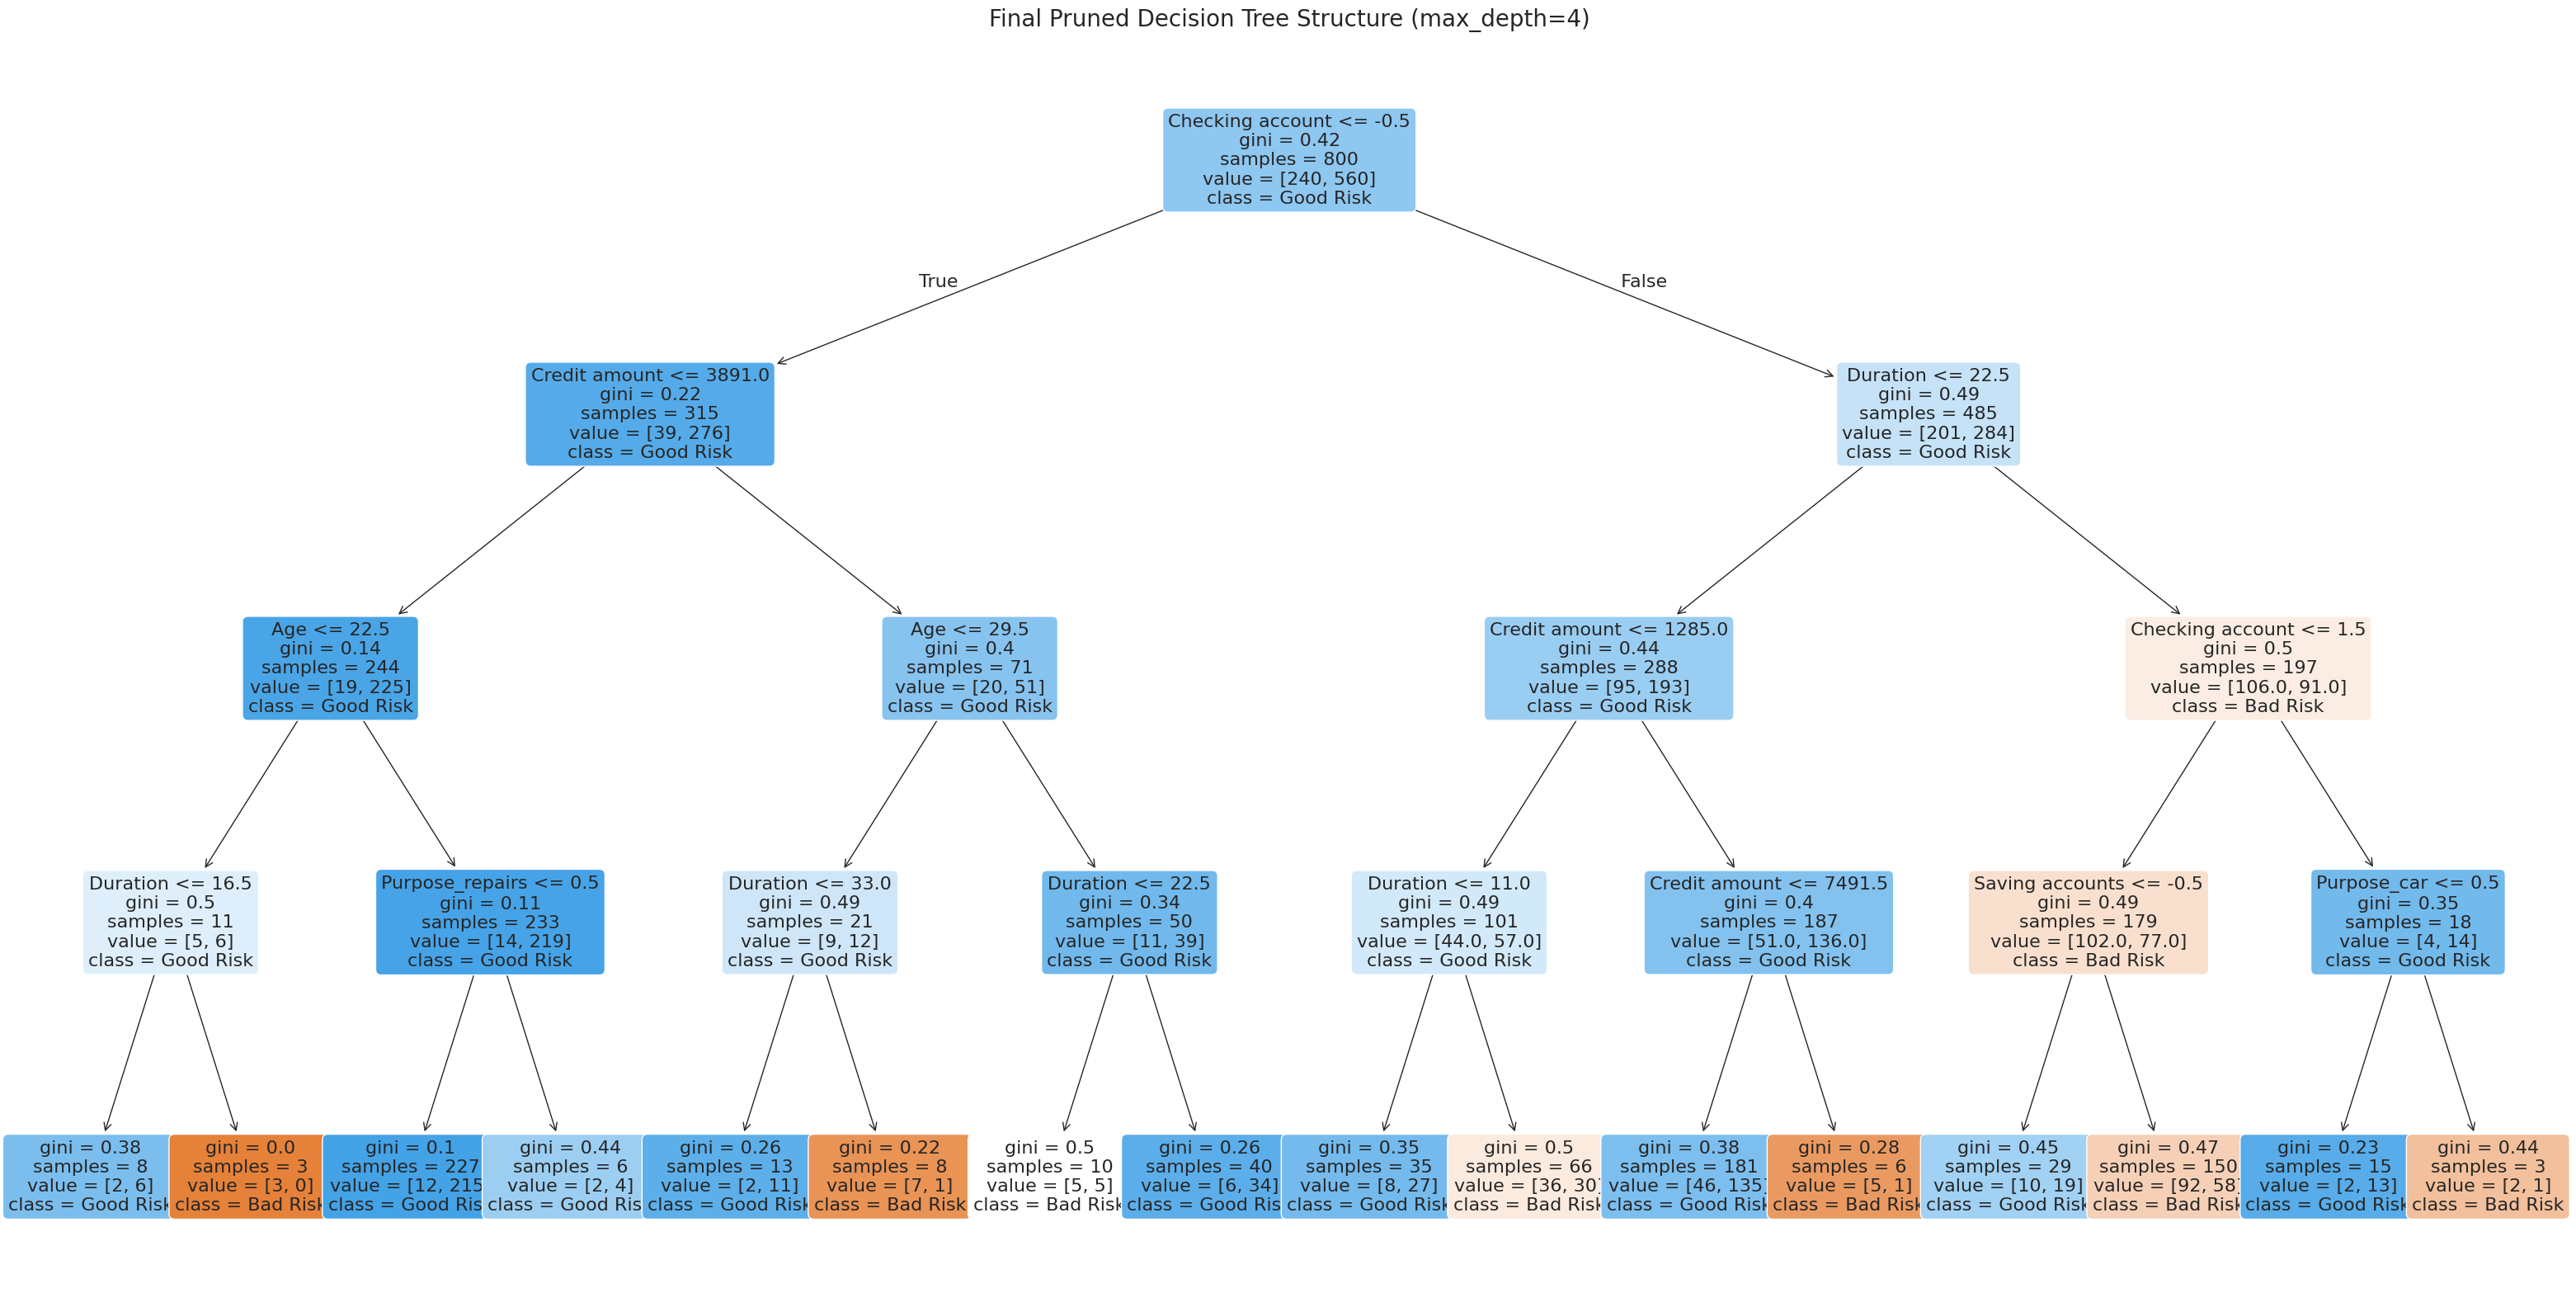

In [ ]:
# --- Plotting the Final Pruned Decision Tree (max_depth=4) ---

# ensure these are defined correctly based on your data preparation:
feature_names = x_train.columns.tolist() # list of feature names used for training
class_names = ['Bad Risk', 'Good Risk']  # corresponding to 0 and 1 after mapping

plt.figure(figsize=(40, 20)) # use a large figure size for better visibility

# Plot the tree using the best pruned classifier (dt_pruned)
plot_tree(dt_pruned,
          filled=True,              # color nodes by majority class for clarity
          rounded=True,             # use rounded boxes for nodes
          feature_names=feature_names, # show feature names at splits
          class_names=class_names,    # show class names for majority class
          fontsize=16,              # adjusting fontsize for readability
          precision=2)              #sShow impurity/values to 2 decimal places

plt.title("Final Pruned Decision Tree Structure (max_depth=4)", fontsize=20)

plt.show()